<a href="https://colab.research.google.com/github/Varstzeiin/Project-2-Rekomendasi-Kopi/blob/main/PROJECT_II_AssociationAnalystModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT LIBRARY**

In [ ]:
pip install --upgrade mlxtend

In [ ]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import mlxtend
print(mlxtend.__version__)

0.23.3


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **DATA PREPARATION**

## Import Data

In [ ]:
# Load the dataset
file_path = '/content/Coffee Shop Sales.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, sheet_name='Transactions')

df.head(10)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Revenue,Month,Month.1,Weekday,Weekday.1,Hour
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,1,Jan,7,Sun,7
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,1,Jan,7,Sun,7
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,1,Jan,7,Sun,7
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,1,Jan,7,Sun,7
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,1,Jan,7,Sun,7
5,6,2023-01-01,07:22:41,1,5,Lower Manhattan,77,3.00,Bakery,Scone,Oatmeal Scone,3.00,1,Jan,7,Sun,7
6,7,2023-01-01,07:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,1,Jan,7,Sun,7
7,8,2023-01-01,07:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm,4.00,1,Jan,7,Sun,7
8,9,2023-01-01,07:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg,4.25,1,Jan,7,Sun,7
9,10,2023-01-01,07:39:34,2,5,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg,7.00,1,Jan,7,Sun,7


## Data Info

In [ ]:
df.info()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
 11  Revenue           149116 non-null  float64       
 12  Month             149116 non-null  int64         
 13  Month.1           149116 non-null  object        
 14  Week

In [ ]:
df.describe()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price,Revenue,Month,Weekday,Hour
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219,4.686367,3.988881,3.982336,11.735790
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000,0.800000,1.000000,1.000000,6.000000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000,3.000000,3.000000,2.000000,9.000000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000,3.750000,4.000000,4.000000,11.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000,6.000000,5.000000,6.000000,15.000000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000,360.000000,6.000000,7.000000,20.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723,4.227099,1.673091,1.996650,3.764662


In [ ]:
df.duplicated().sum()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

## Cleaning Data

In [ ]:
# Cleaning data, removing duplicates, and filtering relevant transactions for "Coffee"
df_cleaned = df.drop_duplicates()
coffee_transactions = df_cleaned[df_cleaned['product_category'] == 'Coffee']
coffee_transactions

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Revenue,Month,Month.1,Weekday,Weekday.1,Hour
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,1,Jan,7,Sun,7
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,1,Jan,7,Sun,7
6,7,2023-01-01,07:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,1,Jan,7,Sun,7
7,8,2023-01-01,07:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm,4.00,1,Jan,7,Sun,7
8,9,2023-01-01,07:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg,4.25,1,Jan,7,Sun,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149103,149444,2023-06-30,19:51:59,2,3,Astoria,26,3.00,Coffee,Organic brewed coffee,Brazilian Rg,6.00,6,Jun,5,Fri,19
149104,149445,2023-06-30,19:52:28,2,3,Astoria,34,2.45,Coffee,Premium brewed coffee,Jamaican Coffee River Sm,4.90,6,Jun,5,Fri,19
149105,149446,2023-06-30,19:53:46,1,3,Astoria,24,3.00,Coffee,Drip coffee,Our Old Time Diner Blend Lg,3.00,6,Jun,5,Fri,19
149106,149447,2023-06-30,19:56:45,1,8,Hell's Kitchen,33,3.50,Coffee,Gourmet brewed coffee,Ethiopia Lg,3.50,6,Jun,5,Fri,19


In [ ]:
coffee_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58416 entries, 0 to 149114
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    58416 non-null  int64         
 1   transaction_date  58416 non-null  datetime64[ns]
 2   transaction_time  58416 non-null  object        
 3   transaction_qty   58416 non-null  int64         
 4   store_id          58416 non-null  int64         
 5   store_location    58416 non-null  object        
 6   product_id        58416 non-null  int64         
 7   unit_price        58416 non-null  float64       
 8   product_category  58416 non-null  object        
 9   product_type      58416 non-null  object        
 10  product_detail    58416 non-null  object        
 11  Revenue           58416 non-null  float64       
 12  Month             58416 non-null  int64         
 13  Month.1           58416 non-null  object        
 14  Weekday           58416 no

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
coffee_transactions.to_excel('coffee_transactions.xlsx', index=False)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **DATA TRANSFORMATION**

In [ ]:
# Transforming data into a basket format
basket = coffee_transactions.groupby(['transaction_id', 'product_detail'])['transaction_qty'].sum().unstack().reset_index().fillna(0)
basket.set_index('transaction_id', inplace=True)

# Convert quantities to binary (1 if purchased, 0 otherwise)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)
basket


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-34-9cb66cacd00d>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


product_detail,Brazilian Lg,Brazilian Rg,Brazilian Sm,Cappuccino,Cappuccino Lg,Columbian Medium Roast Lg,Columbian Medium Roast Rg,Columbian Medium Roast Sm,Espresso shot,Ethiopia Lg,...,Ethiopia Sm,Jamaican Coffee River Lg,Jamaican Coffee River Rg,Jamaican Coffee River Sm,Latte,Latte Rg,Our Old Time Diner Blend Lg,Our Old Time Diner Blend Rg,Our Old Time Diner Blend Sm,Ouro Brasileiro shot
transaction_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149444,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
149446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
basket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15472 entries, 06:00:00 to 20:59:32
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Brazilian Lg                 15472 non-null  int64
 1   Brazilian Rg                 15472 non-null  int64
 2   Brazilian Sm                 15472 non-null  int64
 3   Cappuccino                   15472 non-null  int64
 4   Cappuccino Lg                15472 non-null  int64
 5   Columbian Medium Roast Lg    15472 non-null  int64
 6   Columbian Medium Roast Rg    15472 non-null  int64
 7   Columbian Medium Roast Sm    15472 non-null  int64
 8   Espresso shot                15472 non-null  int64
 9   Ethiopia Lg                  15472 non-null  int64
 10  Ethiopia Rg                  15472 non-null  int64
 11  Ethiopia Sm                  15472 non-null  int64
 12  Jamaican Coffee River Lg     15472 non-null  int64
 13  Jamaican Coffee River Rg     15472 non-nu

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-13-51067e5de2af>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


product_detail,Brazilian Lg,Brazilian Rg,Brazilian Sm,Cappuccino,Cappuccino Lg,Columbian Medium Roast Lg,Columbian Medium Roast Rg,Columbian Medium Roast Sm,Espresso shot,Ethiopia Lg,...,Ethiopia Sm,Jamaican Coffee River Lg,Jamaican Coffee River Rg,Jamaican Coffee River Sm,Latte,Latte Rg,Our Old Time Diner Blend Lg,Our Old Time Diner Blend Rg,Our Old Time Diner Blend Sm,Ouro Brasileiro shot
transaction_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149444,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
149446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
basket_sets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58416 entries, 1 to 149455
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Brazilian Lg                 58416 non-null  int64
 1   Brazilian Rg                 58416 non-null  int64
 2   Brazilian Sm                 58416 non-null  int64
 3   Cappuccino                   58416 non-null  int64
 4   Cappuccino Lg                58416 non-null  int64
 5   Columbian Medium Roast Lg    58416 non-null  int64
 6   Columbian Medium Roast Rg    58416 non-null  int64
 7   Columbian Medium Roast Sm    58416 non-null  int64
 8   Espresso shot                58416 non-null  int64
 9   Ethiopia Lg                  58416 non-null  int64
 10  Ethiopia Rg                  58416 non-null  int64
 11  Ethiopia Sm                  58416 non-null  int64
 12  Jamaican Coffee River Lg     58416 non-null  int64
 13  Jamaican Coffee River Rg     58416 non-null  int64

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **EXPLARATORY DATA ANALYST**

In [ ]:
coffee_transactions['product_detail'].value_counts()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
product_detail,
Columbian Medium Roast Rg,3013
Latte,2990
Our Old Time Diner Blend Sm,2919
Jamaican Coffee River Lg,2911
Brazilian Rg,2904
Latte Rg,2896
Our Old Time Diner Blend Rg,2894
Ethiopia Rg,2866
Ethiopia Sm,2833


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_detail
Columbian Medium Roast Rg      3013
Latte                          2990
Our Old Time Diner Blend Sm    2919
Jamaican Coffee River Lg       2911
Brazilian Rg                   2904
Latte Rg                       2896
Our Old Time Diner Blend Rg    2894
Ethiopia Rg                    2866
Ethiopia Sm                    2833
Brazilian Sm                   2814
Name: count, dtype: int64


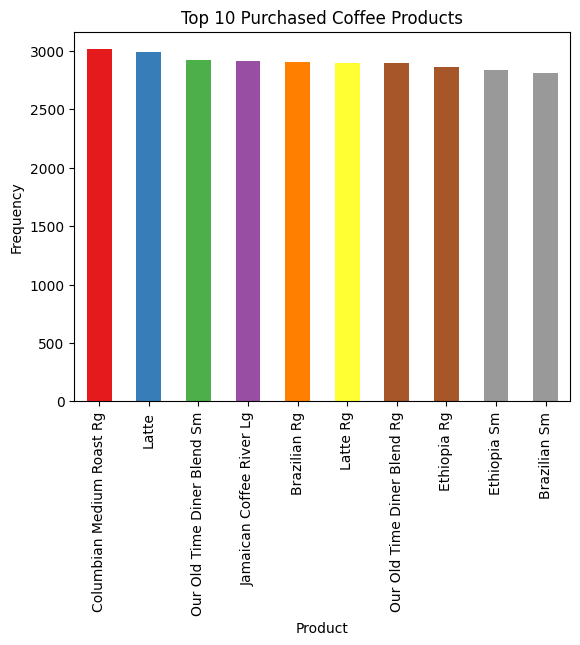

In [ ]:
# Misalkan coffee_transactions adalah DataFrame yang sudah ada
# product_frequency = coffee_transactions['product_detail'].value_counts()
product_frequency = coffee_transactions['product_detail'].value_counts()
print(product_frequency.head(10))

# Mengambil 10 produk teratas
top_products = product_frequency.head(10)

# Membuat palet warna pastel
colors = plt.cm.Set1(np.linspace(0, 1, len(top_products)))

# Plotting
top_products.plot(kind='bar', color=colors, title='Top 10 Purchased Coffee Products')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

# **BUILDING ASSOCIATION RULES**

## Basket

In [ ]:
item_frequencies = coffee_transactions['product_detail'].value_counts(normalize=True)
print(item_frequencies)

product_detail
Columbian Medium Roast Rg      0.051578
Latte                          0.051185
Our Old Time Diner Blend Sm    0.049969
Jamaican Coffee River Lg       0.049832
Brazilian Rg                   0.049712
Latte Rg                       0.049575
Our Old Time Diner Blend Rg    0.049541
Ethiopia Rg                    0.049062
Ethiopia Sm                    0.048497
Brazilian Sm                   0.048172
Cappuccino                     0.047812
Cappuccino Lg                  0.047453
Brazilian Lg                   0.047436
Ethiopia Lg                    0.046922
Columbian Medium Roast Lg      0.046751
Espresso shot                  0.046734
Columbian Medium Roast Sm      0.046700
Our Old Time Diner Blend Lg    0.045604
Jamaican Coffee River Sm       0.045022
Jamaican Coffee River Rg       0.044406
Ouro Brasileiro shot           0.038038
Name: proportion, dtype: float64


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert basket to boolean format
basket_boolean = basket.astype(bool)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Apply apriori with minimum support
frequent_itemsets = apriori(basket, min_support=0.04, use_colnames=True)
print(f"Frequent Itemsets Found: {len(frequent_itemsets)}")

Frequent Itemsets Found: 21


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
# Mengecek apakah frequent_itemsets kosong
if frequent_itemsets.empty:
    print("Frequent itemsets kosong. Kurangi nilai min_support.")
else:
    print(f"Frequent itemsets ditemukan: {frequent_itemsets.shape[0]} itemsets")

Frequent itemsets ditemukan: 21 itemsets


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(frozenset)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Menghasilkan aturan asosiasi dengan argumen tambahan yang diperlukan
rules = association_rules(frequent_itemsets,num_itemsets='num_itemsets', metric='lift', min_threshold=0.05)
if rules.empty:
    print("aturan asosiasi ga ditemukan. Coba kau kurangi kurangi dikit nilai min_support atau min_threshold nya.")
else:
    print(rules.head())

aturan asosiasi ga ditemukan. Coba kau kurangi kurangi dikit nilai min_support atau min_threshold nya.


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **EVALUATION OF RULES**

In [ ]:
# Sorting rules by lift to identify the best associations
rules = rules.sort_values(by='lift', ascending=False)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **REAL TIME INPUT & RECOMMENDATION**

In [ ]:
# Real-time input function for recommendations
def recommend_products_interactive(rules, top_n=3):
    while True:
        print("\n--- Coffee Product Recommendation System ---")
        selected_products = input("Enter purchased product(s) separated by commas (or type 'exit' to quit): ").strip()
        if selected_products.lower() == 'exit':
            print("Exiting the system. Have a great day!")
            break
        selected_products = [product.strip() for product in selected_products.split(',')]

        # Generate recommendations
        recommendations = []
        for product in selected_products:
            for _, row in rules.iterrows():
                if product in row['antecedents']:
                    recommendations.extend(list(row['consequents']))
        recommendations = list(set(recommendations) - set(selected_products))  # Exclude already selected

        if recommendations:
            print(f"Recommendations based on your selection: {recommendations[:top_n]}")
        else:
            print("No recommendations found for the selected product(s).")

# Example usage
recommend_products_interactive(rules)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



--- Coffee Product Recommendation System ---
Enter purchased product(s) separated by commas (or type 'exit' to quit): Brazilian Lg 
No recommendations found for the selected product(s).

--- Coffee Product Recommendation System ---
Enter purchased product(s) separated by commas (or type 'exit' to quit): wxit
No recommendations found for the selected product(s).

--- Coffee Product Recommendation System ---
Enter purchased product(s) separated by commas (or type 'exit' to quit): exit
Exiting the system. Have a great day!


# **INTERPRETATION**

In [ ]:
# Summarize findings and recommendations
print("The top associations have been identified. Use the recommendation system to suggest products to customers in real-time.")

The top associations have been identified. Use the recommendation system to suggest products to customers in real-time.


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
